In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessionimport matplotlib.pyplot as plt

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting options

In [3]:
pd.set_option('display.max_columns', 26)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Read Data

In [4]:
cars_init = pd.read_csv('/kaggle/input/craigslist-carstrucks-data/vehicles.csv')

# Analize data

In [5]:
cars_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
cars_init.shape

(426880, 26)

In [7]:
cars_init.price.describe()

count       426880.00
mean         75199.03
std       12182282.17
min              0.00
25%           5900.00
50%          13950.00
75%          26485.75
max     3736928711.00
Name: price, dtype: float64

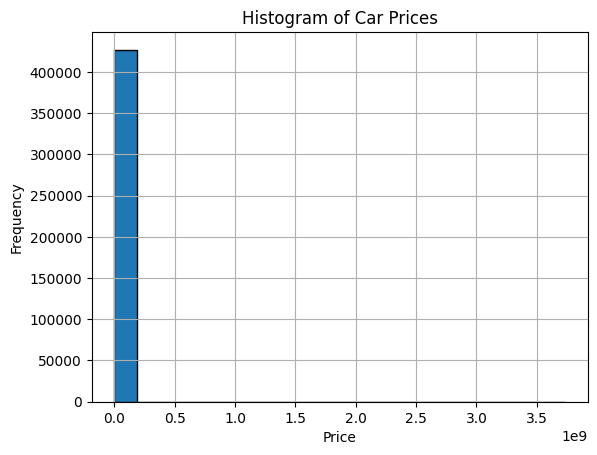

In [8]:
cars_init['price'].hist(bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices')

plt.show()

In [9]:
cars_init.year.describe()


count   425675.00
mean      2011.24
std          9.45
min       1900.00
25%       2008.00
50%       2013.00
75%       2017.00
max       2022.00
Name: year, dtype: float64

In [10]:
cars_init.year.isna().sum()

1205

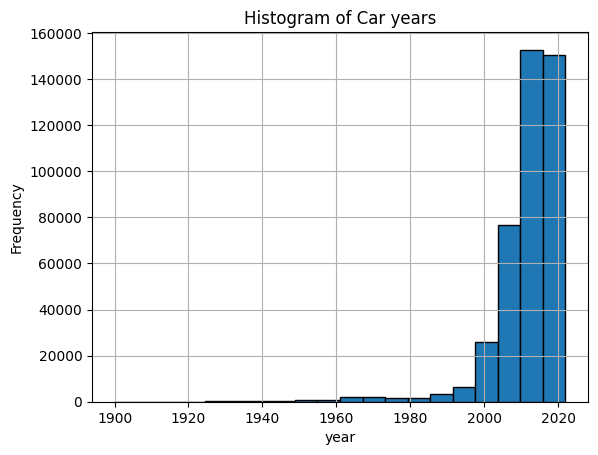

In [11]:
cars_init['year'].hist(bins=20, edgecolor='black')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.title('Histogram of Car years')

plt.show()

In [12]:
cars_init.year.isna()

0          True
1          True
2          True
3          True
4          True
          ...  
426875    False
426876    False
426877    False
426878    False
426879    False
Name: year, Length: 426880, dtype: bool

In [13]:
cars_init.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [14]:
cars_init.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [15]:
print(f'Min price: {cars_init.price.min()} \n')
print(f'Max price: {cars_init.price.max()}')

Min price: 0 

Max price: 3736928711


In [16]:
# cars.loc['price' == 0].count()
min_values = cars_init.select_dtypes(include=['number']).min()
min_values

id         7207408119.00
price               0.00
year             1900.00
odometer            0.00
county               NaN
lat               -84.12
long             -159.83
dtype: float64

In [17]:
max_values = cars_init.select_dtypes(include=['number']).max()
max_values

id         7317101084.00
price      3736928711.00
year             2022.00
odometer     10000000.00
county               NaN
lat                82.39
long              173.89
dtype: float64

In [18]:
non_unique_id = cars_init['id'][cars_init['id'].duplicated()]
print("Non-unique values in column 'id':")
print(non_unique_id.unique())

Non-unique values in column 'id':
[]


In [19]:
len(cars_init.price.unique())

15655

In [20]:
non_unique_price = cars_init['price'][cars_init['price'].duplicated()]
print("Non-unique values in column 'price':")
print(non_unique_price.unique())

Non-unique values in column 'price':
[    0 24999 21850 ...  7075 20796 27294]


In [21]:
cars_init.price.unique()

array([ 6000, 11900, 21000, ...,  6328, 19853, 17873])

In [22]:
# cars.(loc[:,'price'] >= 1000)
cars_init.loc[(cars_init['price'] >= 100) & (cars_init['price'] < 100000), ['price', 'model']]


,price,model
0,6000,NaN
1,11900,NaN
2,21000,NaN
3,1500,NaN
4,4900,NaN
...,...,...
426875,23590,maxima s sedan 4d
426876,30590,s60 t5 momentum sedan 4d
426877,34990,xt4 sport suv 4d
426878,28990,es 350 sedan 4d


In [23]:
cars_init.loc[cars_init['price'] == 0]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
10,7218893038,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
11,7218325704,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
12,7217788283,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
13,7217147606,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
14,7209027818,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,https://wyoming.craigslist.org/ctd/d/casper-pe...,wyoming,https://wyoming.craigslist.org,0,2018.00,NaN,peterbilt 579,NaN,NaN,diesel,1.00,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00F0F_kfjCcZyncy...,"◄ PRICES STARTING AT $57,500 ($57,500 and up, ...",NaN,wy,42.86,-106.31,2021-04-07T15:15:05-0600
426812,7302877815,https://wyoming.craigslist.org/ctd/d/frederick...,wyoming,https://wyoming.craigslist.org,0,2006.00,toyota,scion tc,excellent,4 cylinders,gas,195000.00,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,https://images.craigslist.org/00B0B_dqmLwdZw8Q...,2006 *** TOYOTA SCION TC *** Call or Text ...,NaN,wy,40.11,-104.97,2021-04-06T17:00:19-0600
426832,7302353283,https://wyoming.craigslist.org/ctd/d/frederick...,wyoming,https://wyoming.craigslist.org,0,2004.00,toyota,prius,excellent,4 cylinders,hybrid,239000.00,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,https://images.craigslist.org/00V0V_7Ap4arGS9S...,"2004 *** TOYOTA PRIUS *** Call or Text ""To...",NaN,wy,40.11,-104.97,2021-04-05T17:00:55-0600
426836,7302301268,https://wyoming.craigslist.org/ctd/d/dassel-20...,wyoming,https://wyoming.craigslist.org,0,2018.00,ram,2500,excellent,6 cylinders,diesel,20492.00,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,https://images.craigslist.org/00i0i_3cSpgdy0qQ...,Phone: 320-275-2150 2018 RAM 2500 Tradesman ...,NaN,wy,45.08,-94.33,2021-04-05T15:18:42-0600


# EDA

In [24]:
# cars.id.

# Cleaning

## Drop cars with no year filled

In [25]:
cars = cars_init.dropna(subset=['year'])

In [26]:
del(cars_init)

In [27]:
cars = cars.dropna(subset=['manufacturer'])

## Removing url and links

In [28]:
cars = cars.drop(['url', 'region_url', 'image_url', 'posting_date', 'county'], axis=1, errors='ignore')

In [29]:
cars.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'description', 'state', 'lat',
       'long'],
      dtype='object')

## Drop all cars with price < 1

In [30]:
cars = cars.loc[cars['price'] > 1]

## Drop all cars with price over 100000

In [31]:
cars = cars.loc[cars['price'] < 100000]

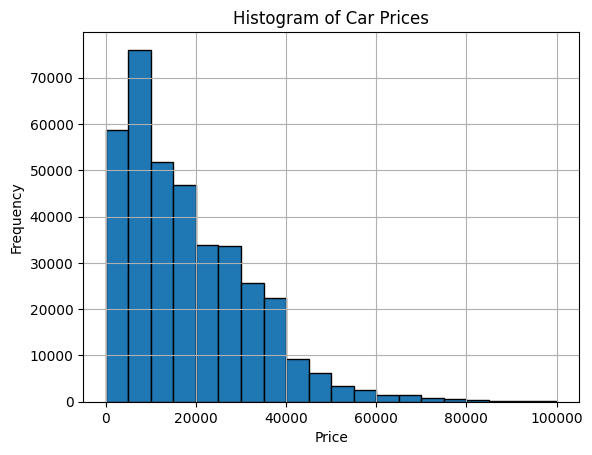

In [32]:
cars['price'].hist(bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices')

plt.show()

## Drop all cars before 1980

In [33]:
cars = cars.loc[cars['year'] > 1980]

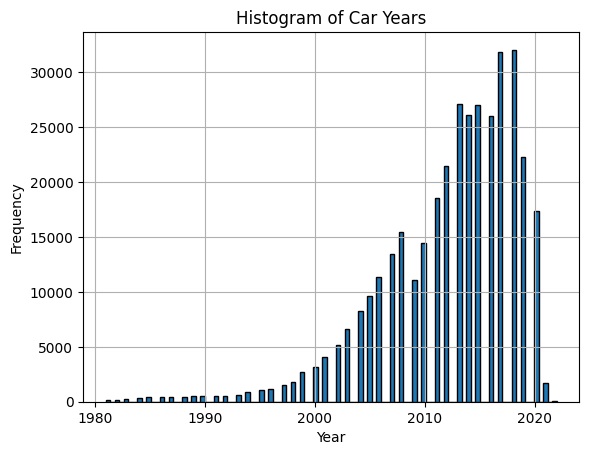

In [34]:
cars['year'].hist(bins=100, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of Car Years')

plt.show()

# 

## Drop cars with wrong odometer > 500000

In [35]:
cars = cars.loc[cars['odometer'] < 500000]

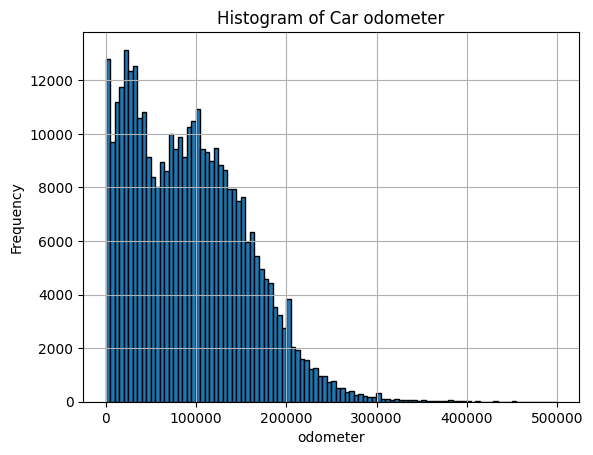

In [36]:
cars['odometer'].hist(bins=100, edgecolor='black')
plt.xlabel('odometer')
plt.ylabel('Frequency')
plt.title('Histogram of Car odometer')

plt.show()

## Format year to datetime

In [37]:
pd.to_datetime(cars['year'].astype(int).astype(str))

27       2014-01-01
28       2010-01-01
29       2020-01-01
30       2017-01-01
31       2013-01-01
            ...    
426875   2019-01-01
426876   2020-01-01
426877   2020-01-01
426878   2018-01-01
426879   2019-01-01
Name: year, Length: 366303, dtype: datetime64[ns]

In [38]:
cars['year'] = pd.to_datetime(cars['year'].astype(int).astype(str) + '-01-01')

## Check title status column

In [39]:
cars.title_status.describe()

count     359235
unique         6
top        clean
freq      347097
Name: title_status, dtype: object

<Axes: >

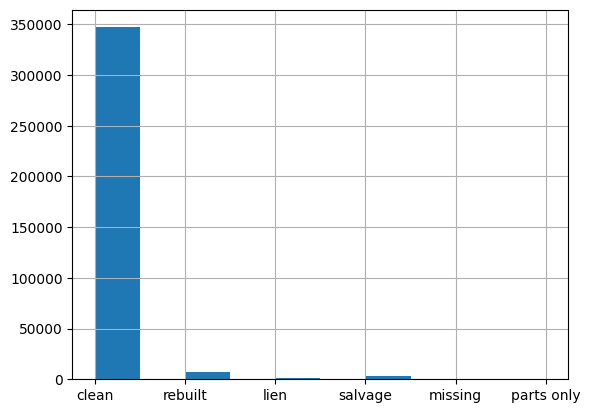

In [40]:
cars.title_status.hist()

In [41]:
cars = cars.loc[cars['title_status'] == 'clean']

### Removing title_status the same clean

In [42]:
cars = cars.drop('title_status', axis=1, errors='ignore')

## Check manufacturer

In [43]:
cars.manufacturer.describe()

count     347097
unique        42
top         ford
freq       59353
Name: manufacturer, dtype: object

In [44]:
cars.manufacturer.value_counts()

manufacturer
ford               59353
chevrolet          45266
toyota             29459
honda              18159
jeep               16087
nissan             15744
ram                15433
gmc                14435
bmw                13042
dodge              10967
mercedes-benz       9515
hyundai             8787
subaru              8163
volkswagen          8086
lexus               7383
kia                 7145
audi                6852
cadillac            5960
acura               5442
chrysler            5188
buick               4712
mazda               4694
infiniti            4244
lincoln             3727
volvo               3023
mitsubishi          2916
mini                2154
rover               1834
jaguar              1830
pontiac             1784
porsche             1162
saturn              1027
mercury              949
alfa-romeo           853
tesla                792
fiat                 717
harley-davidson      132
ferrari               34
aston-martin          18
datsun      

## Check region

In [45]:
cars.region.value_counts()

region
columbus               3041
grand rapids           2765
jacksonville           2733
new hampshire          2715
central NJ             2649
                       ... 
meridian                 16
southwest MS             10
fort smith, AR            8
kansas city               8
west virginia (old)       7
Name: count, Length: 404, dtype: int64

In [46]:
cars.region.unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

### remove region

In [47]:
cars = cars.drop('region', axis=1, errors='ignore')

## check model

In [48]:
cars.model

27        sierra 1500 crew cab slt
28                  silverado 1500
29             silverado 1500 crew
30            tundra double cab sr
31                       f-150 xlt
                    ...           
426875           maxima s sedan 4d
426876    s60 t5 momentum sedan 4d
426877            xt4 sport suv 4d
426878             es 350 sedan 4d
426879    4 series 430i gran coupe
Name: model, Length: 347097, dtype: object

In [49]:
cars.model.value_counts()

model
f-150                        6733
silverado 1500               4281
1500                         3600
camry                        2627
silverado                    2597
                             ... 
c7h top kick                    1
tacoma sr5 double cab 5 b       1
flhtc                           1
dyna                            1
gand wagoneer                   1
Name: count, Length: 19755, dtype: int64

In [50]:
cars['model'].isna().sum()

3432

In [51]:
cars['model'] = cars['model'].fillna('other')

### remove low volume models

In [52]:
cars.model.value_counts() > 1000

model
f-150                     True
silverado 1500            True
1500                      True
other                     True
camry                     True
                         ...  
capitiva ltz             False
liberty sport limited    False
duramax crew             False
eclipse gs-t             False
gand wagoneer            False
Name: count, Length: 19755, dtype: bool

In [53]:
cars['model'].value_counts() > 3000

model
f-150                     True
silverado 1500            True
1500                      True
other                     True
camry                    False
                         ...  
capitiva ltz             False
liberty sport limited    False
duramax crew             False
eclipse gs-t             False
gand wagoneer            False
Name: count, Length: 19755, dtype: bool

## Checking state

In [54]:
cars.state.describe()

count     347097
unique        51
top           ca
freq       38685
Name: state, dtype: object

In [55]:
cars.state.value_counts()

state
ca    38685
fl    23480
tx    18971
ny    16422
oh    14673
mi    14253
or    12906
pa    11222
nc    10821
wa    10634
wi    10021
co     9284
tn     9194
il     8905
nj     8589
va     7963
id     7559
ma     7201
az     7200
mn     6470
ia     6383
ga     5823
ks     5375
mt     5325
ok     5120
sc     4979
in     4973
ct     4521
al     4079
md     3962
mo     3633
ky     3585
nm     3211
ak     3131
ar     2970
nh     2715
nv     2615
me     2515
dc     2481
hi     2458
la     2438
vt     2239
ri     1983
sd     1040
wv      891
ut      874
ne      853
ms      848
de      808
wy      482
nd      334
Name: count, dtype: int64

## we have all us states so can drop lat, long

In [56]:
cars = cars.drop(['lat', 'long'], axis=1, errors='ignore')

In [57]:
cars.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'VIN', 'drive', 'size',
       'type', 'paint_color', 'description', 'state'],
      dtype='object')

## removing VIN col

In [58]:
cars = cars.drop('VIN', axis=1, errors='ignore')

In [59]:
cars.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'description', 'state'],
      dtype='object')

## checking condition

In [60]:
cars.condition.describe()

count     210257
unique         6
top         good
freq      108830
Name: condition, dtype: object

In [61]:
cars.condition.value_counts()

condition
good         108830
excellent     77896
like new      17486
fair           5013
new             861
salvage         171
Name: count, dtype: int64

In [62]:
cars.condition = cars.condition.fillna('other')

## checking cilinders

In [63]:
cars.cylinders.describe()

count          201812
unique              8
top       6 cylinders
freq            78568
Name: cylinders, dtype: object

In [64]:
cars.cylinders.value_counts()

cylinders
6 cylinders     78568
4 cylinders     62529
8 cylinders     57011
5 cylinders      1416
10 cylinders     1037
other             703
3 cylinders       456
12 cylinders       92
Name: count, dtype: int64

In [65]:
cars.cylinders.isna().sum()

145285

In [66]:
cars.cylinders = cars.cylinders.fillna('999 other')

In [67]:
cars.cylinders.value_counts()

cylinders
999 other       145285
6 cylinders      78568
4 cylinders      62529
8 cylinders      57011
5 cylinders       1416
10 cylinders      1037
other              703
3 cylinders        456
12 cylinders        92
Name: count, dtype: int64

In [68]:
cars.cylinders = cars.cylinders.replace('other', '999 other')

In [69]:
cars.cylinders = cars['cylinders'].str.extract('(\d+)').astype(int)

In [70]:
cars.cylinders.value_counts()

cylinders
999    145988
6       78568
4       62529
8       57011
5        1416
10       1037
3         456
12         92
Name: count, dtype: int64

## checking fuel

In [71]:
cars.fuel.value_counts()

fuel
gas         291379
other        26545
diesel       21625
hybrid        4567
electric      1488
Name: count, dtype: int64

In [72]:
cars.fuel.isna().sum()

1493

In [73]:
cars.fuel = cars.fuel.fillna('other')

## checking transmission

In [74]:
cars.transmission.value_counts()

transmission
automatic    270881
other         57774
manual        17028
Name: count, dtype: int64

In [75]:
cars.transmission = cars.transmission.fillna('other')

## checking drive

In [76]:
cars.drive.value_counts()

drive
4wd    109738
fwd     89313
rwd     45053
Name: count, dtype: int64

In [77]:
cars.drive = cars.drive.fillna('other')

## checking size

In [78]:
cars['size'] = cars['size'].fillna('other')


In [79]:
cars['size'].value_counts()

size
other          251189
full-size       50352
mid-size        28123
compact         14963
sub-compact      2470
Name: count, dtype: int64

## checking type

In [80]:
cars['type'].value_counts()

type
sedan          72055
SUV            63972
pickup         38889
truck          26196
other          18477
coupe          14618
hatchback      13955
wagon           9150
van             6878
convertible     5955
mini-van        4146
offroad          444
bus              277
Name: count, dtype: int64

In [81]:
cars['type'].isna().sum()

72085

In [82]:
cars['type'] = cars['type'].fillna('other')

## checking paint_color

In [83]:
cars['paint_color'].value_counts()

paint_color
white     65826
black     54031
silver    37026
blue      26263
red       25224
grey      20361
green      5740
custom     5721
brown      5592
orange     1433
yellow     1384
purple      510
Name: count, dtype: int64

In [84]:
cars['paint_color'].isna().sum()

97986

In [85]:
cars['paint_color'] = cars['paint_color'].fillna('other')

## checking description

In [86]:
cars['description'].value_counts()

description
Call or text today to find out more. (602) 620-6525 Calls only landline (406) 245-1785  Available at Standard Auto Sales 1503 Broadwater Ave. Billings, MT 59102 standardautosales.net   Need help with financing? We have options for most credit situations. We never charge a doc fee! Extended service contracts available. We buy cars and take consignments! Call or text Mike today to find out more. (602) 620-6525  Welcome to Standard Auto Sales, located in Billings, MT, where quality service and customer satisfaction come first. We are here to help you find a vehicle that fits your lifestyle from our wide selection of used cars, trucks, and SUVs. We pride ourselves on a hassle-free car buying experience where your needs come first. Swing by to let us exceed your expectations while finding the perfect vehicle! Do you need financing for your next used vehicle purchase? Do you have a good credit, bad credit or no credit history situation? We work with a variety of financial institu

### should be dropped 

In [87]:
cars = cars.drop('description', axis=1, errors='ignore')

## set index

In [88]:
cars.set_index('id', inplace=True)

## dataframe info

In [89]:
cars.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
id,,,,,,,,,,,,,,
7316814884,33590,2014-01-01,gmc,sierra 1500 crew cab slt,good,8,gas,57923.00,other,other,other,pickup,white,al
7316814758,22590,2010-01-01,chevrolet,silverado 1500,good,8,gas,71229.00,other,other,other,pickup,blue,al
7316814989,39590,2020-01-01,chevrolet,silverado 1500 crew,good,8,gas,19160.00,other,other,other,pickup,red,al
7316743432,30990,2017-01-01,toyota,tundra double cab sr,good,8,gas,41124.00,other,other,other,pickup,red,al
7316356412,15000,2013-01-01,ford,f-150 xlt,excellent,6,gas,128000.00,automatic,rwd,full-size,truck,black,al


In [90]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347097 entries, 7316814884 to 7301591129
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         347097 non-null  int64         
 1   year          347097 non-null  datetime64[ns]
 2   manufacturer  347097 non-null  object        
 3   model         347097 non-null  object        
 4   condition     347097 non-null  object        
 5   cylinders     347097 non-null  int64         
 6   fuel          347097 non-null  object        
 7   odometer      347097 non-null  float64       
 8   transmission  347097 non-null  object        
 9   drive         347097 non-null  object        
 10  size          347097 non-null  object        
 11  type          347097 non-null  object        
 12  paint_color   347097 non-null  object        
 13  state         347097 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memor

In [91]:
cars.describe()

,price,year,cylinders,odometer
count,347097.00,347097,347097.00,347097.00
mean,19113.53,2012-02-27 02:52:55.806186752,423.63,93178.00
min,2.00,1981-01-01 00:00:00,3.00,0.00
25%,7500.00,2009-01-01 00:00:00,6.00,38332.00
50%,15990.00,2013-01-01 00:00:00,8.00,88178.00
75%,27990.00,2017-01-01 00:00:00,999.00,136216.00
max,99999.00,2022-01-01 00:00:00,999.00,499232.00
std,14354.27,NaN,490.22,63435.67


In [92]:
cars.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

array([[<Axes: title={'center': 'price'}>]], dtype=object)

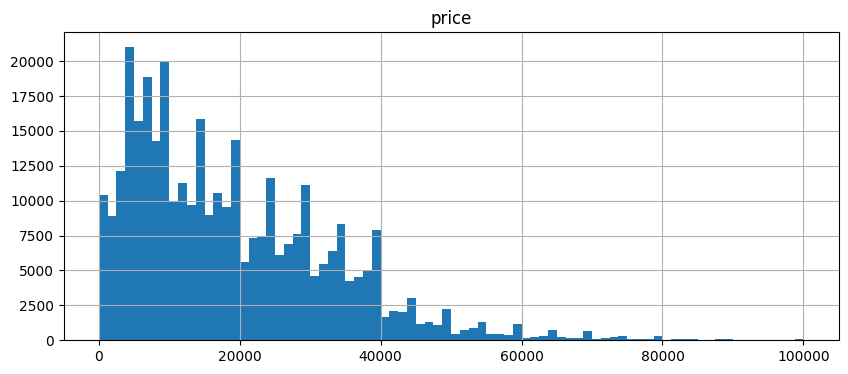

In [93]:
cars.hist(column='price', grid=True, bins=80,  figsize=(10, 4))

<Axes: xlabel='manufacturer'>

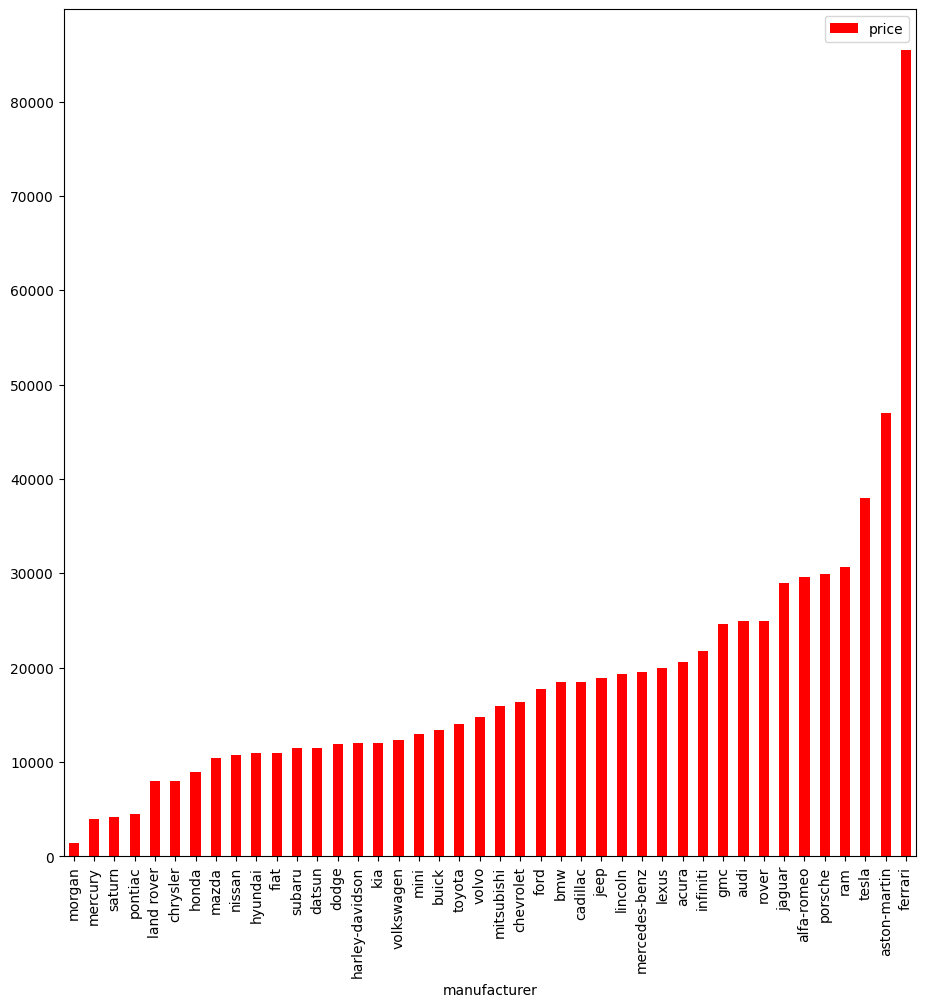

In [94]:
cars.groupby('manufacturer')['price'].median().sort_values().plot(kind='bar', figsize=(11, 11), legend='True', color='r')

<Axes: ylabel='year'>

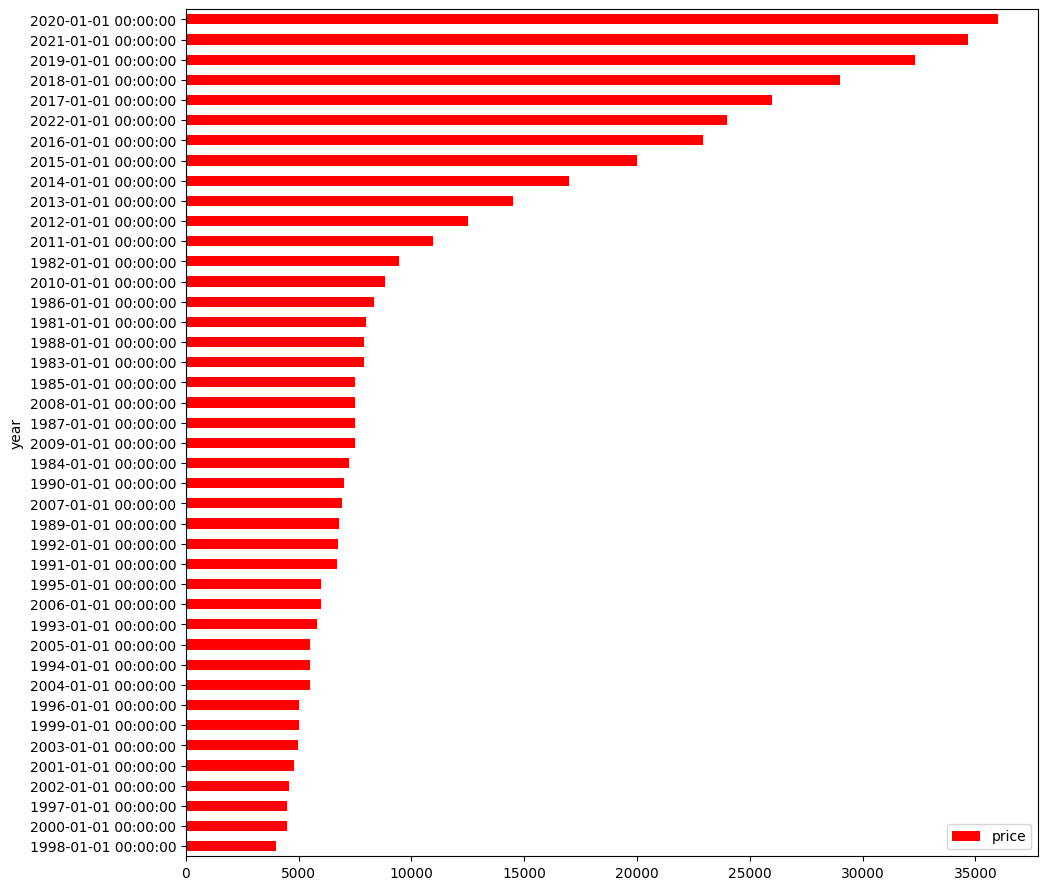

In [95]:
cars.groupby('year')['price'].median().sort_values().plot(kind='barh', figsize=(11, 11), legend='True', color='r')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='price'>

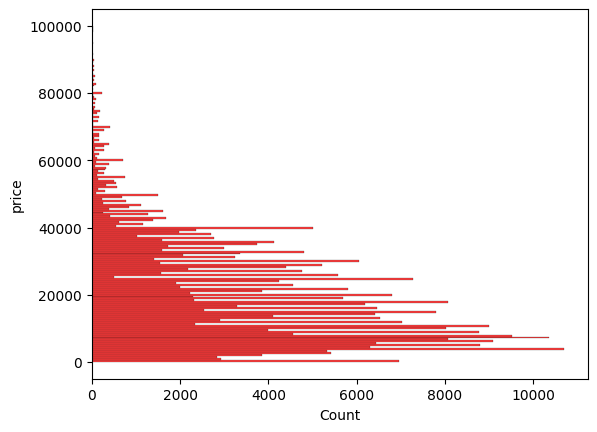

In [96]:
sns.histplot(y='price', data=cars, color='red')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

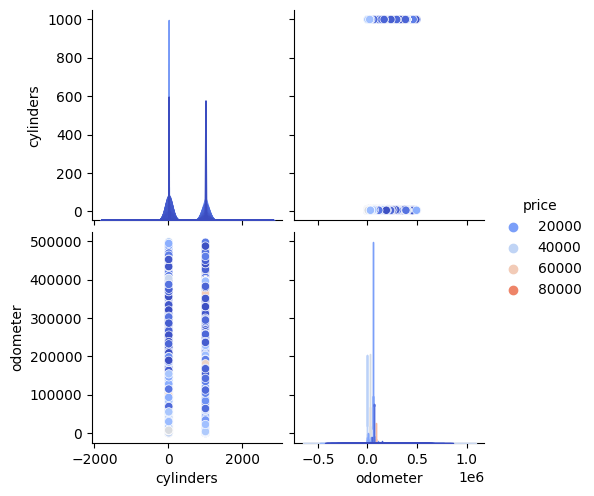

In [97]:
sns.pairplot(cars, hue="price", palette="coolwarm")
